## Calorie Burn Prediction Model

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('gym_members_data.csv')
df.head(20)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56.0,Male,88.3,1.71,180.0,157.0,60.0,1.69,1313.0,Yoga,12.6,3.5,4.0,3.0,30.20
1,46.0,Female,74.9,1.53,179.0,151.0,66.0,1.30,883.0,HIIT,33.9,2.1,4.0,2.0,32.00
2,32.0,Female,68.1,1.66,167.0,122.0,54.0,1.11,677.0,Cardio,33.4,2.3,4.0,2.0,24.71
3,25.0,Male,53.2,1.70,190.0,164.0,56.0,0.59,532.0,Strength,28.8,2.1,3.0,1.0,18.41
4,38.0,Male,46.1,1.79,188.0,158.0,68.0,0.64,556.0,Strength,29.2,2.8,3.0,1.0,14.39
5,56.0,Female,58.0,1.68,168.0,156.0,74.0,1.59,1116.0,HIIT,15.5,2.7,5.0,3.0,20.55
6,36.0,Male,70.3,1.72,174.0,169.0,73.0,1.49,1385.0,Cardio,21.3,2.3,3.0,2.0,23.76
7,40.0,Female,69.7,1.51,189.0,141.0,64.0,1.27,895.0,Cardio,30.6,1.9,3.0,2.0,30.57
8,28.0,Male,121.7,1.94,185.0,127.0,52.0,1.03,719.0,Strength,28.9,2.6,4.0,2.0,32.34
9,28.0,Male,101.8,1.84,169.0,136.0,64.0,1.08,808.0,Cardio,29.7,2.7,3.0,1.0,30.07


In [3]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1039.000000,1036.000000,1043.000000,1041.000000,1040.000000,1047.000000,1046.000000,1036.000000,1045.000000,1047.000000,1040.000000,1041.000000,1040.000000
mean,38.781521,73.563803,1.722579,179.907781,143.994231,62.255969,1.253834,907.736486,25.109187,2.622541,3.336538,1.816523,24.946798
std,12.170964,21.032380,0.128416,11.549607,14.369320,7.325497,0.342009,272.207024,6.212877,0.598331,0.909902,0.737691,6.652353
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.620000,170.000000,131.000000,56.000000,1.040000,720.750000,21.300000,2.200000,3.000000,1.000000,20.200000
50%,40.000000,69.550000,1.710000,180.000000,143.000000,62.000000,1.265000,895.000000,26.400000,2.600000,3.000000,2.000000,24.160000
75%,50.000000,85.625000,1.800000,190.000000,157.000000,68.000000,1.450000,1080.250000,29.400000,3.100000,4.000000,2.000000,28.567500
max,59.000000,129.900000,2.000000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [4]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1039 non-null   float64
 1   Gender                         1042 non-null   object 
 2   Weight (kg)                    1036 non-null   float64
 3   Height (m)                     1043 non-null   float64
 4   Max_BPM                        1041 non-null   float64
 5   Avg_BPM                        1040 non-null   float64
 6   Resting_BPM                    1047 non-null   float64
 7   Session_Duration (hours)       1046 non-null   float64
 8   Calories_Burned                1036 non-null   float64
 9   Workout_Type                   1039 non-null   object 
 10  Fat_Percentage                 1045 non-null   float64
 11  Water_Intake (liters)          1047 non-null   float64
 12  Workout_Frequency (days/week)  1040 non-null   f

## Data Cleaning

In [6]:
nan_values_per_column = df.isna().sum()
nan_values_per_column

Age                              34
Gender                           31
Weight (kg)                      37
Height (m)                       30
Max_BPM                          32
Avg_BPM                          33
Resting_BPM                      26
Session_Duration (hours)         27
Calories_Burned                  37
Workout_Type                     34
Fat_Percentage                   28
Water_Intake (liters)            26
Workout_Frequency (days/week)    33
Experience_Level                 32
BMI                              33
dtype: int64

In [7]:
#Total NaN Values in the DataFrame
df.isna().sum().sum()

473

In [8]:
#Dropping rows that have 3 or more NaN Values
df = df[df.isnull().sum(axis=1) <= 3]

#Replacing NaN values in numerical columns with the mean of the column
numeric_cols = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df['Calories_Burned'] = df['Calories_Burned'].fillna(df['Calories_Burned'].mean())

#Replacing NaN values in categorcial columns with the mode of the column
df['Experience_Level']= df['Experience_Level'].astype(str)
categorical_cols = ['Gender', 'Workout_Type', 'Experience_Level']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

df.isna().sum().sum()

0

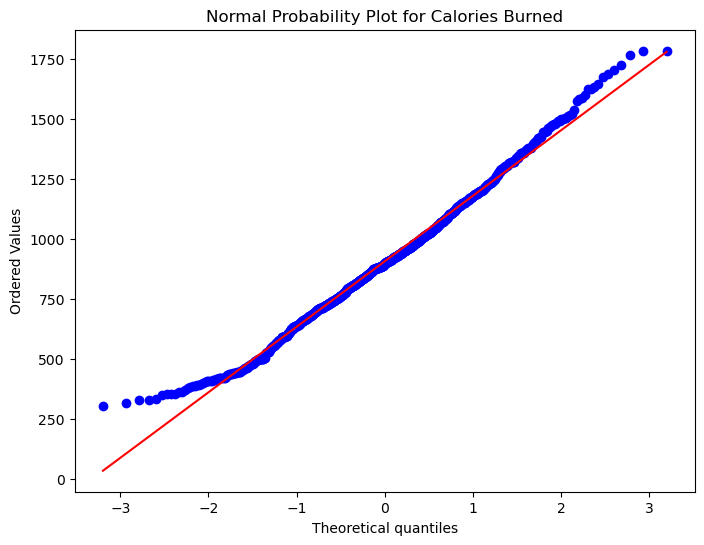

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt

calories_burned = df['Calories_Burned'].dropna()

plt.figure(figsize=(8, 6))
stats.probplot(calories_burned, dist="norm", plot=plt)
plt.title("Normal Probability Plot for Calories Burned")
plt.show()

## Outliers

In [10]:
import numpy as np

z_scores = np.abs(stats.zscore(calories_burned))

threshold = 1.96

filtered_calories = calories_burned[z_scores < threshold]

print(f"Original number of entries: {len(calories_burned)}")
print(f"Number of entries after removing outliers: {len(filtered_calories)}")

df['Calories_Burned'] = df['Calories_Burned'][z_scores < threshold]


Original number of entries: 998
Number of entries after removing outliers: 949


In [11]:
df = df[df['Calories_Burned'].notna()]
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

## Setting up SQLite Database

In [12]:
pip install sqlite3

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
Note: you may need to restart the kernel to use updated packages.


In [13]:
import sqlite3

In [14]:
conn = sqlite3.connect('gym_data.db')
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS gym_members (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    age INTEGER,
    gender TEXT,
    weight_kg REAL,
    height_m REAL,
    max_bpm INTEGER,
    avg_bpm INTEGER,
    resting_bpm INTEGER,
    session_duration_hours REAL,
    calories_burned REAL,
    workout_type TEXT,
    fat_percentage REAL,
    water_intake_liters REAL,
    workout_frequency_days INTEGER,
    experience_level INTEGER,
    bmi REAL
)
""")
conn.commit()
print("Database and table created successfully.")


Database and table created successfully.


In [15]:
data = df.copy()
data.columns = [
    'age', 'gender', 'weight_kg', 'height_m', 'max_bpm', 'avg_bpm', 'resting_bpm',
    'session_duration_hours', 'calories_burned', 'workout_type', 'fat_percentage',
    'water_intake_liters', 'workout_frequency_days', 'experience_level', 'bmi'
]
data.to_sql('gym_members', conn, if_exists='replace', index=False)
print("Data inserted successfully.")

Data inserted successfully.


## Data Visualization

In [16]:
import seaborn as sns

### Query

In [17]:
query = "SELECT calories_burned FROM gym_members"
dq = pd.read_sql_query(query, conn)

### Histogram for the Distribution of Calories Burned

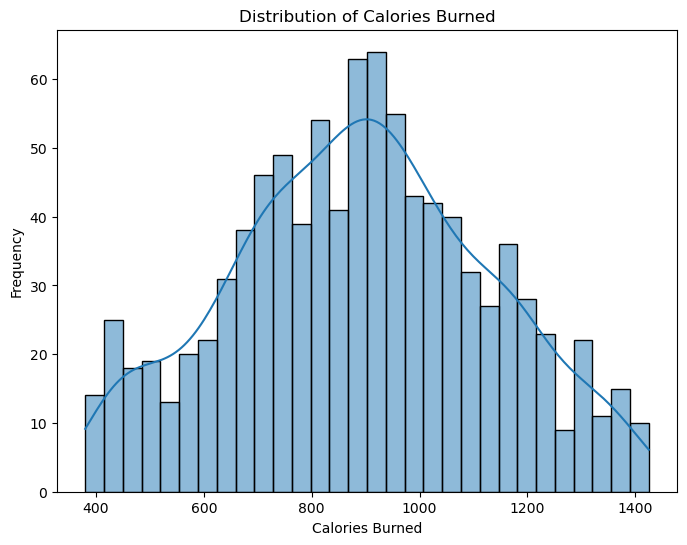

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(dq['calories_burned'], kde=True, bins=30)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()

### Query

In [19]:
query = "SELECT age FROM gym_members"
dq = pd.read_sql_query(query, conn)

### Distribution of Ages

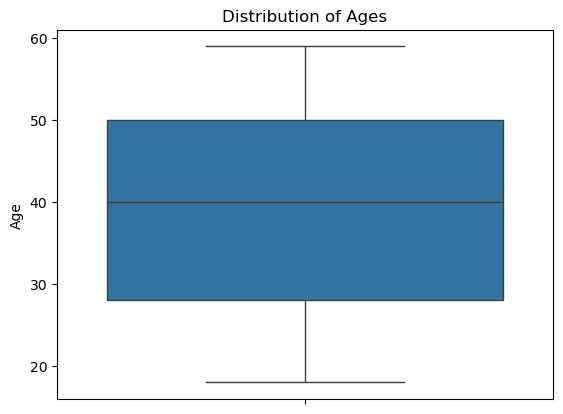

In [20]:
sns.boxplot(y='age', data=dq)
plt.title('Distribution of Ages')
plt.ylabel('Age')
plt.show()

### Query

In [21]:
query = "SELECT height_m FROM gym_members"
dq = pd.read_sql_query(query, conn)

### Distribution of Heights

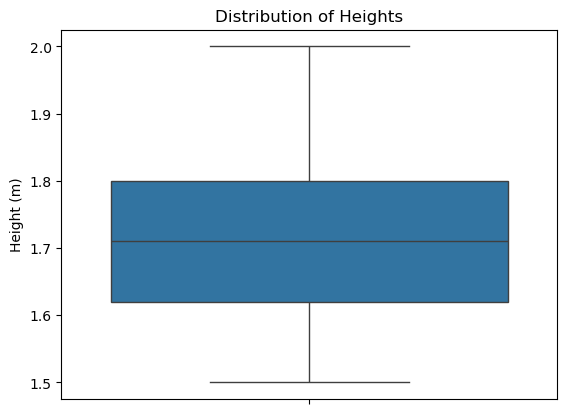

In [22]:
sns.boxplot(y='height_m', data=dq)
plt.title('Distribution of Heights')
plt.ylabel('Height (m)')
plt.show()

### Query

In [23]:
query = "SELECT weight_kg FROM gym_members"
dq = pd.read_sql_query(query, conn)

### Distribution of Weights

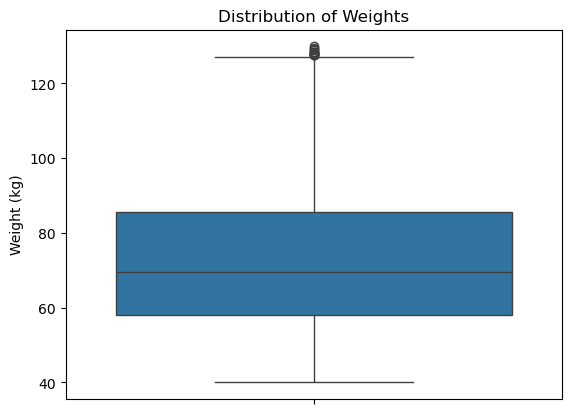

In [24]:
sns.boxplot(y='weight_kg', data=dq)
plt.title('Distribution of Weights')
plt.ylabel('Weight (kg)')
plt.show()

### Query

In [25]:
query = """
SELECT gender, COUNT(*) AS count
FROM gym_members
GROUP BY gender
"""
dq = pd.read_sql_query(query, conn)

### Distribution of Gender

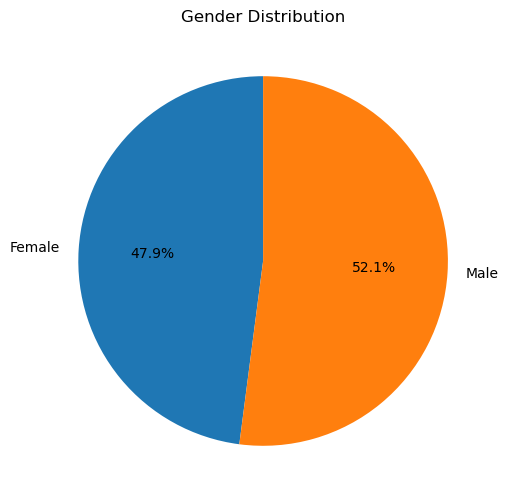

In [26]:
plt.figure(figsize=(6, 6))
plt.pie(dq['count'], labels=dq['gender'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

### Query

In [27]:
query = "SELECT session_duration_hours, calories_burned FROM gym_members"
dq = pd.read_sql_query(query, conn)

### Session Duration vs. Calories Burned Scatterplot

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='session_duration_hours', y='calories_burned', data=dq)
plt.title('Session Duration vs. Calories Burned')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()

### Query

In [29]:
query = """
SELECT workout_type, AVG(calories_burned) AS avg_calories
FROM gym_members
GROUP BY workout_type
"""
dq = pd.read_sql_query(query, conn)

### Workout Types vs. Calories Burned Barplot

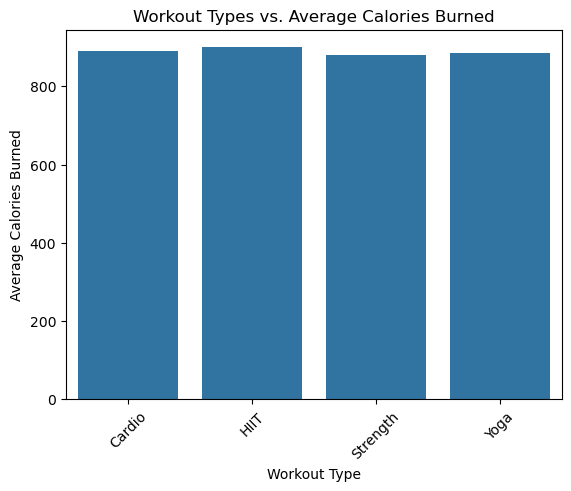

In [30]:
sns.barplot(x='workout_type', y='avg_calories', data=dq)
plt.title('Workout Types vs. Average Calories Burned')
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned')
plt.xticks(rotation=45)
plt.show()

### Query

In [31]:
query = "SELECT age, calories_burned FROM gym_members"
dq = pd.read_sql_query(query, conn)

### Age vs. Calories Burned Scatterplot

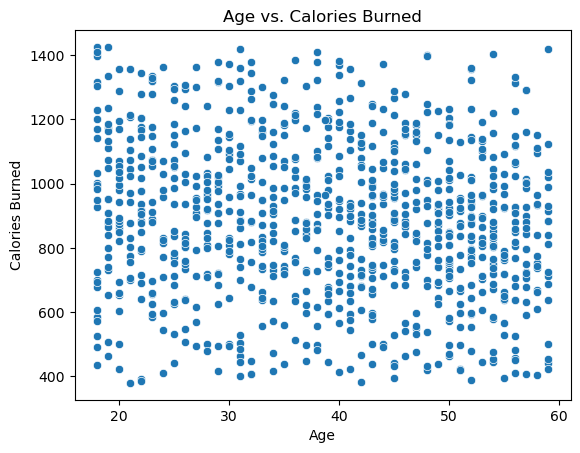

In [32]:
sns.scatterplot(x='age', y='calories_burned', data=dq)
plt.title('Age vs. Calories Burned')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.show()

### Query

In [33]:
query = """
SELECT experience_level, AVG(calories_burned) AS avg_calories
FROM gym_members
GROUP BY experience_level
"""
dq = pd.read_sql_query(query, conn)
dq['experience_level'] = dq['experience_level'].replace('nan', np.nan)
dq=dq.dropna(subset=['experience_level'])

### Experience Level vs. Calories Burned

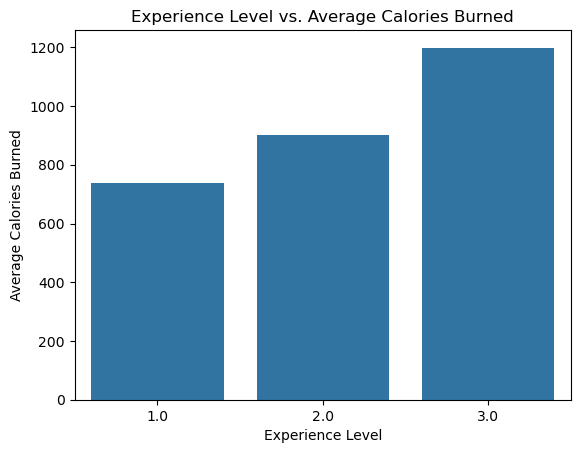

In [34]:
sns.barplot(x='experience_level', y='avg_calories', data=dq)
plt.title('Experience Level vs. Average Calories Burned')
plt.xlabel('Experience Level')
plt.ylabel('Average Calories Burned')
plt.show()

### Query

In [35]:
query = """
SELECT workout_type, AVG(avg_bpm) AS avg_bpm, AVG(max_bpm) AS max_bpm, AVG(resting_bpm) AS resting_bpm
FROM gym_members
GROUP BY workout_type
"""
dq = pd.read_sql_query(query, conn)

### Average BPM, Max BPM, Resting BPM by Workout Type

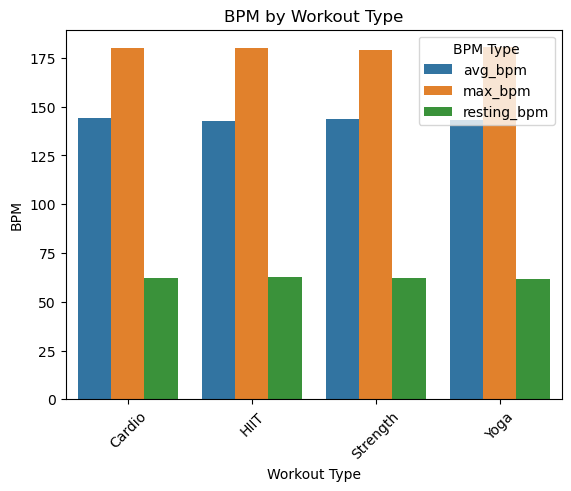

In [36]:
dq_melt = dq.melt(id_vars='workout_type', var_name='BPM Type', value_name='BPM')
sns.barplot(x='workout_type', y='BPM', hue='BPM Type', data=dq_melt)
plt.title('BPM by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('BPM')
plt.xticks(rotation=45)
plt.show()

### Query

In [37]:
query = "SELECT max_bpm, avg_bpm, resting_bpm, calories_burned FROM gym_members"
dq = pd.read_sql_query(query, conn)

### BPM (Max, Average, Resting) vs. Calories Burned

In [ ]:
sns.pairplot(dq, x_vars=['max_bpm', 'avg_bpm', 'resting_bpm'], y_vars='calories_burned')
plt.suptitle('BPM Effects on Calories Burned', y=1.02)
plt.show()

### Query

In [39]:
query = "SELECT weight_kg, calories_burned FROM gym_members"
dq = pd.read_sql_query(query, conn)

### Weight vs. Calories Burned

In [ ]:
sns.scatterplot(x='weight_kg', y='calories_burned', data=dq)
plt.title('Weight vs. Calories Burned')
plt.xlabel('Weight (kg)')
plt.ylabel('Calories Burned')
plt.show()

## One Hot Encoding

In [41]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Gender', 'Workout_Type', 'Experience_Level']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded_data = encoder.fit_transform(df[categorical_cols])
df_encoded = pd.DataFrame(one_hot_encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
final_df = pd.concat([df.drop(columns=categorical_cols), df_encoded], axis=1)
print(final_df)

      Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0    56.0         88.3        1.71    180.0    157.0         60.0   
1    46.0         74.9        1.53    179.0    151.0         66.0   
2    32.0         68.1        1.66    167.0    122.0         54.0   
3    25.0         53.2        1.70    190.0    164.0         56.0   
4    38.0         46.1        1.79    188.0    158.0         68.0   
..    ...          ...         ...      ...      ...          ...   
848   NaN          NaN         NaN      NaN      NaN          NaN   
896   NaN          NaN         NaN      NaN      NaN          NaN   
897   NaN          NaN         NaN      NaN      NaN          NaN   
910   NaN          NaN         NaN      NaN      NaN          NaN   
930   NaN          NaN         NaN      NaN      NaN          NaN   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                        1.69           1313.0            12.6   
1                        1.30          

## Linear Regression Model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

final_df.dropna(inplace = True)
X = final_df.drop('Calories_Burned', axis = 1)
y = final_df['Calories_Burned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Predictions

In [43]:
y_pred = model.predict(X_test)

## Model Evaluation

In [44]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

1887.7432999291793
0.9667942526657842
